<a href="https://colab.research.google.com/github/bhausaheb-pachaptil/DIVP_PRACTRICAL/blob/main/Experiment_01_DIVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install OpenCV if not present (usually already available)
!pip install opencv-python

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Saving baboon.png to baboon.png
Uploaded image: baboon.png


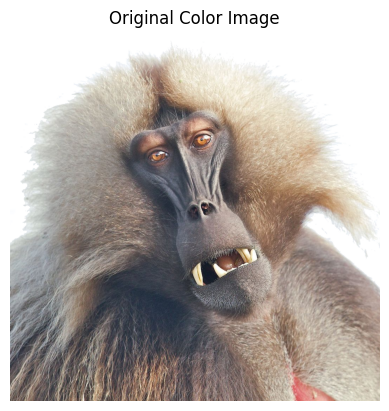

In [2]:
# Upload one image
uploaded = files.upload()

# Get the first uploaded file name
image_name = list(uploaded.keys())[0]
print("Uploaded image:", image_name)

# Read the uploaded image using OpenCV
# cv2.imread cannot read directly from uploaded dict, so we use imdecode
file_bytes = np.frombuffer(uploaded[image_name], np.uint8)
img_bgr = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

# Convert BGR (OpenCV) to RGB (for correct display in matplotlib)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Show original image
plt.imshow(img_rgb)
plt.title("Original Color Image")
plt.axis("off")
plt.show()

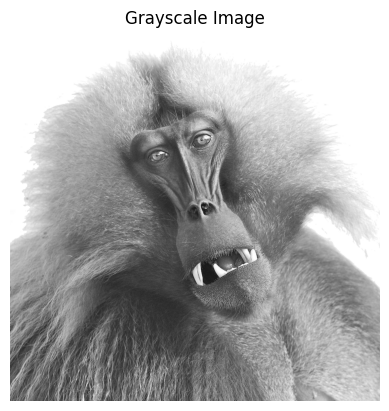

In [3]:
# Convert RGB image to Grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

Step 5: Linear Transformation (Contrast + Brightness)

Formula:

𝑠
(
𝑥
,
𝑦
)
=
𝑎
⋅
𝑟
(
𝑥
,
𝑦
)
+
𝑏
s(x,y)=a⋅r(x,y)+b

a = contrast factor

b = brightness offset

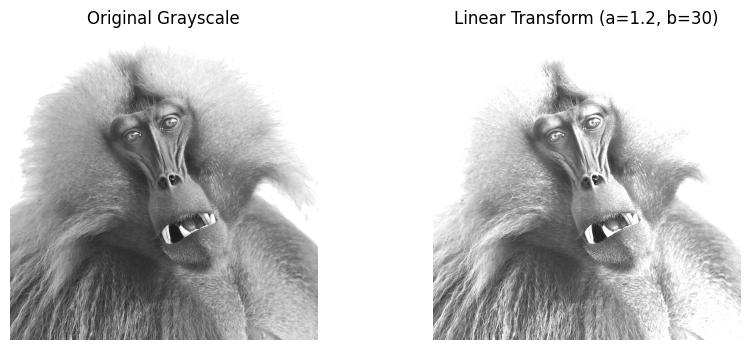

In [4]:
# Linear transformation on grayscale image
a = 1.2   # contrast control (>1 = higher contrast)
b = 30    # brightness control (positive = brighter)

linear = a * gray + b

# Clip values to valid range [0, 255] and convert to uint8
linear = np.clip(linear, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(linear, cmap='gray')
plt.title(f"Linear Transform (a={a}, b={b})")
plt.axis("off")

plt.show()

Step 6: Logarithmic Transformation

Formula:

𝑠
(
𝑥
,
𝑦
)
=
𝑐
⋅
log
⁡
(
1
+
𝑟
(
𝑥
,
𝑦
)
)
s(x,y)=c⋅log(1+r(x,y))

Enhances dark regions more than bright regions.

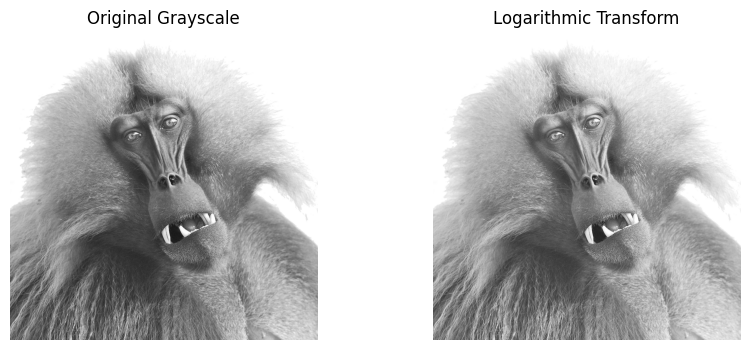

In [5]:
# Normalize grayscale image to [0,1] for log transform
gray_norm = gray / 255.0

# Choose constant c
c = 1.0

# Apply log transform
log_transformed = c * np.log(1 + gray_norm)

# Normalize back to [0,255]
log_transformed = log_transformed / np.max(log_transformed)  # to [0,1]
log_transformed = (log_transformed * 255).astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(log_transformed, cmap='gray')
plt.title("Logarithmic Transform")
plt.axis("off")

plt.show()

Step 7: Negative Image (Image Complement)

Formula for 8-bit image:

𝑠
(
𝑥
,
𝑦
)
=
255
−
𝑟
(
𝑥
,
𝑦
)
s(x,y)=255−r(x,y)

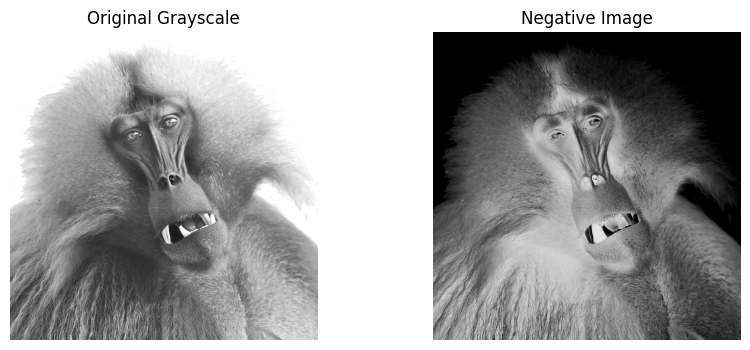

In [6]:
# Negative of grayscale image
negative = 255 - gray

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(negative, cmap='gray')
plt.title("Negative Image")
plt.axis("off")

plt.show()
